# *Statistics coded:* Causes of death statistics

Prepared by  [**Katharina Koehler**](@kkatha) ([LinkedIn](https://www.linkedin.com/in/katharina-köhler-99b2b4178)) ([EMOS](https://ec.europa.eu/eurostat/web/european-statistical-system/emos)).

The objective of this notebook is to reproduce the figures of the *Statistics Explained* article on [**causes of death**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

This article gives an overview of recent statistics on [causes of death](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Cause_of_death) in the [European Union (EU)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Union_(EU)). For some statistics, not only EU member states are analysed but also [EFTA](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:EFTA) countries (Norway, Liechtenstein, Switzerland and Iceland), potential member states (Serbia and Turkey) and the UK. By relating all deaths in the population to an underlying cause of death, the risks associated with death from a range of specific diseases and other causes can be assessed; these figures can be further analysed by age, sex, country where the death occurred/residency of the deceased, and region ([NUTS](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Nomenclature_of_territorial_units_for_statistics_(NUTS)) level 2), using [standardised death rates](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Standardised_death_rate_(SDR)).

## Configuration

Puting all libraries/packages/modules/etc... that are necessary to run this notebook.

In [1]:
#install.packages(c("ggplot2", "dplyr", "restatapi","patchwork","formattable","kableExtra"))

In [2]:
library(ggplot2)
library(dplyr)
library(patchwork)
library(restatapi)
#library (eurostat)
library(kableExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


restatapi: - config file with the API version 1 loaded from GitHub (the 'current' API version number is 1).
           - no parallel computing.
           - 'libcurl' will be used for file download.
           - the Table of contents (TOC) was not pre-loaded into the deafult cache ('.restatapi_env').


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




## Loading relevant datasets for analyses/ graphics

Pulling data from [_Eurostat_ API](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/rest-request), id / code used in function argument _hlth_cd_asdr2_ and _hlth_cd_asdr_ to identify dataset:
- [hlth_cd_asdr2](https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_asdr2/default/table?lang=en): Causes of death - standardised death rate by residence, 2011-2017 needed
- [hlth_cd_asdr](https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_asdr/default/table?lang=en): Causes of death - standardised death rate per 100 000 inhabitants - annual data, 2006-2010 needed

### First step

Define variables for relevant countries (EU-member states and EU, EFTA, potential member states and the UK)

### Second Step

- Loading the complete dataset per bulk download via API -> Filtering the complete data set accordingly with `R` commands later
- `dataset1` = years 2011-2017, `dataset_2` = years 2006-2010
- change data format to keep only the year (done with `substring` command)

In [3]:
EU_27 <- c("AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
           "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE")
countries <- c("EU27_2020","BE", "BG","CZ","DK", "DE", "EE","IE","EL","ES","FR","HR", "IT",
               "CY","LV","LT","LU","HU","MT","NL","AT","PL","PT","RO","SK","SI","FI","SE","UK","IS","LI","NO","CH","RS","TR")
Country <- c("EU-27","Belgium","Bulgaria","Czechia","Denmark","Germany","Estonia","Ireland",
                "Greece","Spain","France","Croatia","Italy","Cyprus","Latvia","Lithuania",
                "Luxembourg","Hungary","Malta","Netherlands","Austria","Poland","Portugal",
                "Romania","Slovenia","Slovakia","Finland","Sweden","United Kingdom","Iceland",
                "Liechtenstein","Norway","Switzerland","Serbia","Turkey")

In [4]:
dataset1 <- get_eurostat_data(id="hlth_cd_asdr2")

In [5]:
dataset1$time <- as.integer(substr(dataset1$time,1,4))

In [6]:
dataset_2 <- get_eurostat_data(id="hlth_cd_asdr",stringsAsFactors = FALSE)

Warning message in get_eurostat_data(id = "hlth_cd_asdr", stringsAsFactors = FALSE):
“NAs introduced by coercion”


In [7]:
dataset_2 <- subset(dataset_2,dataset_2$time >= 2006)

In [8]:
dataset_2$time <- as.integer(substr(dataset_2$time,1,4))

## Main findings

The code here will help reproducing the material presented in the section [Main findings](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

### Table 1: Causes of death - standardised death rate 2017, per 100 000 inhabitants

#### First steps: Filter data accordingly

  - only keeping relevant countries (see defined variable above)
  - creating one values variable with values from 2017 and from 2016 where 2017 not available (for France and EU27 category)
  - using for causes of death like breast cancer only females data
  - keeping only causes of death relevant for table
  - deleting not needed variables/columns

In [9]:
datatbl1 <- subset(dataset1,
                     dataset1$age =="TOTAL" & 
                    dataset1$geo %in% countries & 
                     (dataset1$time==2017 | dataset1$time==2016))

In [10]:
datatbl1$values_n <- ifelse(datatbl1$time==2017,datatbl1$values,NA)
datatbl1[datatbl1$geo=="FR",]$values_n <- datatbl1[datatbl1$geo=="FR",]$values
datatbl1[datatbl1$geo=="EU27_2020",]$values_n <- datatbl1[datatbl1$geo=="EU27_2020",]$values
datatbl1 <- datatbl1[!is.na(datatbl1$values_n),]

In [11]:
causes <- c("I","I20-I25","C","C33_C34","C18-C21","J","G_H","V_Y85","X60-X84_Y870","C50","C53","C54_C55")
causes2 <- c("Circulatory disease","Heart disease","Cancer","Lung Cancer","Colorectal cancer","Respiratory diseases",
             "Diseases of the nervous system","Transport accidents","Suicide","Breast Cancer (Females)","Cancer of the cervix(Females)",
             "Cancer of the uterus(Females)")
datatbl1_v <- datatbl1[datatbl1$icd10 %in% causes,]
datatbl1 <- datatbl1[datatbl1$icd10 %in% causes,]
datatbl1 <- subset(datatbl1_v,datatbl1_v$sex=="T")
datatbl1$values_n[datatbl1$icd10 == "C50"] <- datatbl1_v$values_n[datatbl1_v$icd10=="C50"&datatbl1_v$sex=="F"]
datatbl1$values_n[datatbl1$icd10 == "C53"] <- datatbl1_v$values_n[datatbl1_v$icd10=="C53"&datatbl1_v$sex=="F"]
datatbl1$values_n[datatbl1$icd10 == "C54_C55"] <- datatbl1_v$values_n[datatbl1_v$icd10=="C54_C55"&datatbl1_v$sex=="F"]
datatbl11 <- datatbl1[,c(4,5,8)]
#tail(datatbl11)

#### Second steps: Table
  
  - changing data frame format: 
    - creating seperate data frame for every cause (with two columns, country & values of death rate)
    - ordering data frames according to the order of the original datatable & add columnnames
  - creating new dataset in style of the original data table
  - printing data table

In [12]:
datlist <- vector(mode="list",12)
for(i in 1:length(causes)){
  datlist[[i]] <- subset(datatbl11,datatbl11$icd10 == causes[i])
  datlist[[i]] <- datlist[[i]][,-1]
  datlist[[i]] <- datlist[[i]][order(factor(datlist[[i]]$geo, levels= countries)),]
  colnames(datlist[[i]]) <- c("country",causes2[i]) 
}

In [13]:
(table1 <- cbind(Country, datlist[[1]][,2],
      datlist[[2]][,2],
      datlist[[3]][,2],
      datlist[[4]][,2],
      datlist[[5]][,2],
      datlist[[6]][,2],
      datlist[[7]][,2],
      datlist[[8]][,2],
      datlist[[9]][,2],
      datlist[[10]][,2],
      datlist[[11]][,2],
      datlist[[12]][,2]))

Country,Circulatory disease,Heart disease,Cancer,Lung Cancer,Colorectal cancer,Respiratory diseases,Diseases of the nervous system,Transport accidents,Suicide,Breast Cancer (Females),Cancer of the cervix(Females),Cancer of the uterus(Females)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EU-27,370.19,119.37,257.06,52.85,30.69,74.91,40.29,6.03,10.75,32.67,3.95,6.66
Belgium,262.91,65.43,240.06,52.88,25.52,108.62,51.10,5.49,15.43,34.83,2.88,6.22
Bulgaria,1115.83,194.77,232.81,43.69,33.31,67.66,13.02,8.21,9.76,29.35,8.85,9.12
Czechia,586.05,292.26,275.80,53.06,36.72,90.87,36.58,6.85,13.19,28.73,5.66,7.38
Denmark,242.30,70.12,287.93,66.75,33.72,123.53,48.36,3.55,10.49,37.23,3.14,5.20
Germany,383.65,139.09,248.01,49.65,26.47,75.17,34.93,4.18,10.56,35.79,3.32,5.19
Estonia,633.81,240.07,289.24,48.40,37.78,43.22,25.34,4.97,17.26,31.79,8.90,6.94
Ireland,290.14,133.04,270.93,56.49,30.82,135.52,49.51,3.08,8.41,37.82,4.33,6.94
Greece,368.14,105.46,246.68,60.99,21.80,107.52,29.57,8.06,4.52,32.21,2.07,5.82


#### Additional step

  - Creating HTML data table with `kableExtra` package with adjusted colors and footnotes

In [14]:
kbl (table1)%>%
    row_spec(0,background="#eded6d",bold=T)%>%
    row_spec (1,background="#edd16d") %>%
    row_spec(29,background="#cfccc4") %>%
    row_spec(30:33,background="#b8b5ad") %>%
    row_spec(34:35,background="#a19e99") %>%
    footnote(general="Heart disease = ischeamic heart diseases,
    Cancer = malignant neoplasms, 
    Lung cancer = malignant neoplasms of trachea, bronchus and lung,
    France & EU 27 with numbers from 2016, 
    Definitions differ for Turkey,
    Source: https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_asdr2/default/table?lang=en") %>%
    kable_styling(bootstrap_options=c("striped","hover"))%>%
    kable_paper (full_width=FALSE)%>% as.character() %>%   IRdisplay::display_html()

Country,Circulatory disease,Heart disease,Cancer,Lung Cancer,Colorectal cancer,Respiratory diseases,Diseases of the nervous system,Transport accidents,Suicide,Breast Cancer (Females),Cancer of the cervix(Females),Cancer of the uterus(Females)
EU-27,370.19,119.37,257.06,52.85,30.69,74.91,40.29,6.03,10.75,32.67,3.95,6.66
Belgium,262.91,65.43,240.06,52.88,25.52,108.62,51.10,5.49,15.43,34.83,2.88,6.22
Bulgaria,1115.83,194.77,232.81,43.69,33.31,67.66,13.02,8.21,9.76,29.35,8.85,9.12
Czechia,586.05,292.26,275.80,53.06,36.72,90.87,36.58,6.85,13.19,28.73,5.66,7.38
Denmark,242.30,70.12,287.93,66.75,33.72,123.53,48.36,3.55,10.49,37.23,3.14,5.20
Germany,383.65,139.09,248.01,49.65,26.47,75.17,34.93,4.18,10.56,35.79,3.32,5.19
Estonia,633.81,240.07,289.24,48.40,37.78,43.22,25.34,4.97,17.26,31.79,8.90,6.94
Ireland,290.14,133.04,270.93,56.49,30.82,135.52,49.51,3.08,8.41,37.82,4.33,6.94
Greece,368.14,105.46,246.68,60.99,21.80,107.52,29.57,8.06,4.52,32.21,2.07,5.82
Spain,238.34,63.70,228.46,47.85,31.75,100.47,51.31,4.42,7.53,23.71,2.60,5.88


## Developments between 2006 & 2016

The code here will help reproducing the material presented in the section [Developments between 2006 and 2010](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

### Figures 1 & 2: Causes of death - standardised death rate per 100 000 inhabitants, EU-27, 2006-2016

#### First steps: 

  - Merging two datasets to get data in the time interval 2006 - 2010
  - Applying filters (same procedure for females and males)
    - Filter dataset with `subset` command (Male/ Female, age, only the summarising country level EU 27)
    - keep only relevant causes for the graphic (`C`=Cancer, `C_33-C34`=Lung cancer, `C_50`=Breast Cancer, `G_H`=Nervous system, `I20_I25`=Ischaemic heart disease, `V_Y85`=Transport Accidents) & drop empty levels with `droplevels` command
    - check structure/ levels with `str` command

In [15]:
# Merge:
dataset_3 <- rbind(dataset1,dataset_2) 
#str(dataset_3)

1. Filter Males

In [16]:
##Graphic Males, 2006-2016, 100=2006
datagr1 <- subset(dataset_3, dataset_3$sex=="M" & dataset_3$age =="TOTAL" &
                     dataset_3$geo == "EU27_2020")
datagr1 <- subset(datagr1, datagr1$time >=2006)
#Keep only causes relevant for graphic
causesm <- c("V_Y85","C","G_H","I20-I25","C33_C34")
datagr1 <- datagr1[datagr1$icd10 %in% causesm,]
datagr1 <- droplevels(datagr1)

2. Filter Females

In [17]:
##Graphic Females, 2006-2016, 100=2006
datagr2 <- subset(dataset_3, dataset_3$sex=="F" & dataset_3$age =="TOTAL" &
                     dataset_3$geo == "EU27_2020")
datagr2 <- subset(datagr2, datagr2$time >=2006)
#Keep only causes relevant for graphic
causesf <- c("V_Y85","C","G_H","I20-I25","C50","C33_C34")
datagr2 <- datagr2[datagr2$icd10 %in% causesf,]
datagr2 <- droplevels(datagr2)

#### Second step: Standardize such that 2006 = 100

  - same procedure for females and males
    - taking the values from year 2006 for each cause (2009 for lung cancer)
    - dividing all other respective values with value from 2006/2009 divided by 100
    
1. Males

In [18]:
for (i in 1:4){
    datagr1$values[datagr1$icd10==causesm[i]] <- (datagr1$values[datagr1$icd10==causesm[i]])/
    ((datagr1$values[datagr1$icd10==causesm[i] & datagr1$time==2006])/100)
}
datagr1$values[datagr1$icd10==causesm[5]] <- (datagr1$values[datagr1$icd10==causesm[5]])/
    ((datagr1$values[datagr1$icd10==causesm[5] & datagr1$time==2009])/100)

2. Females

In [19]:
for (i in 1:5){
    datagr2$values[datagr2$icd10==causesf[i]] <- (datagr2$values[datagr2$icd10==causesf[i]])/
    ((datagr2$values[datagr2$icd10==causesf[i] & datagr2$time==2006])/100)
}
datagr2$values[datagr2$icd10==causesf[6]] <- (datagr2$values[datagr2$icd10==causesf[6]])/
    ((datagr2$values[datagr2$icd10==causesf[6] & datagr2$time==2009])/100)

#### Third step: Create graphic with `ggplot2` package

  - using the package `ggplot` to create the line plot for males and females (+ connects the different subcommands for the graphic)
  - creating the space with `aes` (variables on x and y axis, grouped by _icd10_ - causes of death)
  - adding the lines for the different causes of death with `geom_line`, different colors for each cause and with `linewidth` 1
  - adding a horizontal line for the start value (of the rate) 100 of 2006, in black, `linetype` 2 (dashed) 
  - creating the title with `subtitle`
  - setting the values for the `y` and `x` axis 
  - changing the overall theme to `"classic"` (white background)
  - definining the `legend` position
  - filling the legend manually with _icd10_ definitions and colors (token from the original graphic with hex code)
  - deleting labeling of axes
  - changing the size of `title` and `subtitle`

1. Males

In [20]:
options(repr.plot.width=8, repr.plot.height=6)

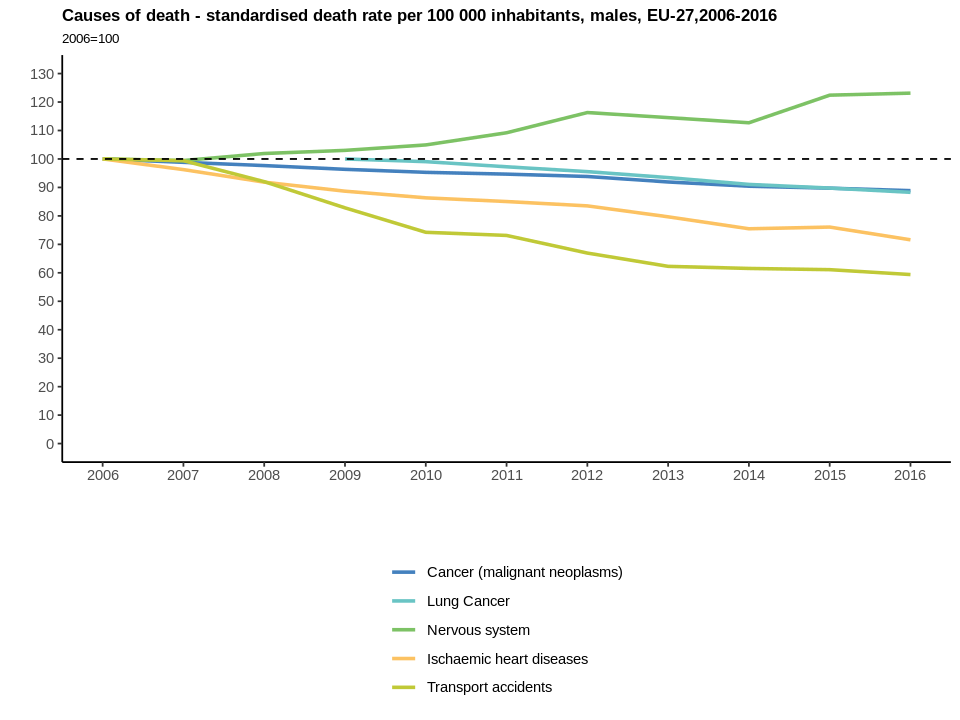

In [21]:
figure1 <- ggplot(datagr1, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=1) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants, males, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)", "Lung Cancer", "Nervous system","Ischaemic heart diseases",
                                 "Transport accidents"), 
            values = c("#4481be","#69c4c4","#7dc265","#fcc262","#c0c937"),name = " ") +
    ylab(" ")+
    xlab(" ")

figure1 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

2. Females

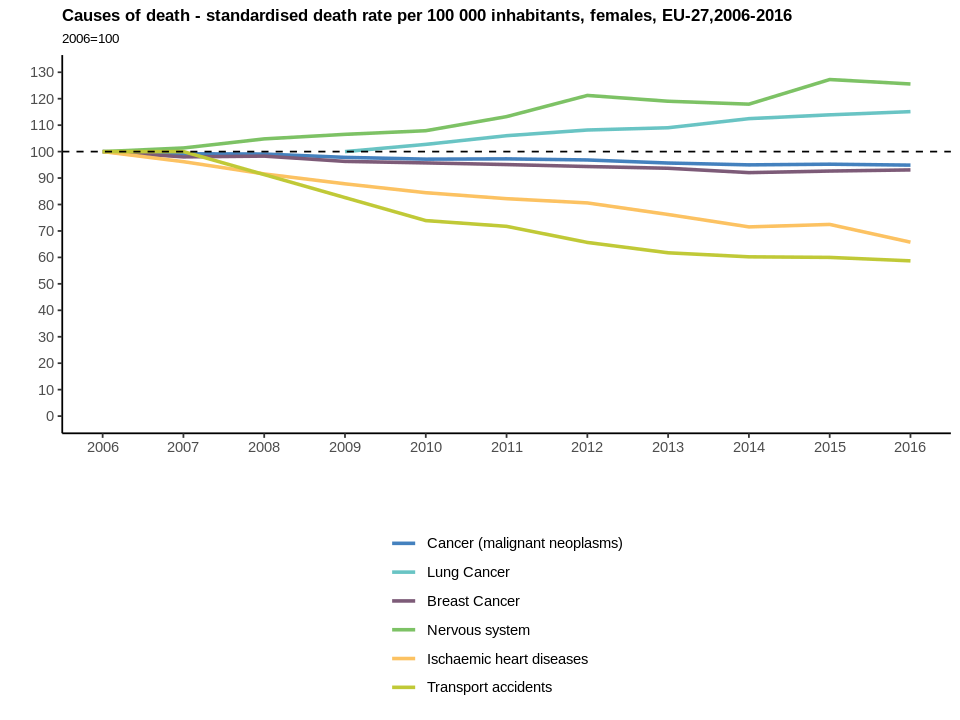

In [22]:
figure2 <- ggplot(datagr2, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=1) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants, females, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)", "Lung Cancer", "Breast Cancer",
                                  "Nervous system","Ischaemic heart diseases",
                                 "Transport accidents"), 
    values = c("#4481be","#69c4c4","#7d5b78","#7dc265","#fcc262","#c0c937"), name = " ") +
    ylab(" ")+
    xlab(" ")

figure2 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

## Causes of death by sex

The code here will help reproducing the material presented in the section [Causes of death by sex](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).
 
### Figure 3: Causes of death - standardised death rate, EU-27,2016

#### First steps: Apply relevant filters
  
  - defining variable with causes of death relevant for the graphic
  - keeping only observations of year 2016, EU27_2020, age in total
  - deleting unused variables & levels from dataset (`age`, `unit`, `time`, `geo`)
  - checking structure/ values of ordered dataset (do they match to the graphic) 

In [23]:
causes2 <- c("I20-I25", #Ischaemic heart diseases
            "I60-I69", #Cerebrovascular diseases
            "C33_C34", #Mallignant neoplasms of trachea, broncus and lung
            "J40-J47", #Chronic lower respiratory diseases
             "ACC", #Accidents
            "C18-C21", #Malignant neoplasms of colon, rectosigmoid junction, rectum, anus and anal canal
            "J12-J18", #Pneumonia
            "E10-E14", #Diabetes mellitus
            "C25", #Malignant neoplasms of pancreas
            "C50", #Malignant neoplasms of breast
            "N00-N29", #Diseases of kidney and ureter
            "K70_K73_K74", #Chronic liver disease
            "C16", #Malignant neoplasms of stomach
            "X60-X84_Y870", #Intentional self harm
            "F10", #Mental and behavioural disorders due to use of alcohol
            "B20-B24", #HIV
             "TOXICO") #Drug dependence

In [24]:
data_fig3 <- subset(dataset1, dataset1$time==2016  & 
                      dataset1$geo=="EU27_2020" &
                    dataset1$icd10 %in% causes2 &
                    dataset1$age=="TOTAL")
data_fig3 <- droplevels(data_fig3)
data_fig3 <- data_fig3[,-c(1,3,5,6)]
str(data_fig3)

Classes ‘data.table’ and 'data.frame':	51 obs. of  3 variables:
 $ sex   : Factor w/ 3 levels "F","M","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 17 levels "ACC","B20-B24",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ values: num  21.79 0.27 7.67 23.2 15.04 ...
 - attr(*, ".internal.selfref")=<externalptr> 


#### Second step: Modify dataset

  - changing the order within the dataset to get the ranked structure
  - ranking on the average values of males and females (deleting total of sex) & releveling of the variable _icd10_ according to ranks
  - dividing dataset into two parts to be able to visualise two different scales

In [25]:
data_fig3 <- subset(data_fig3, data_fig3$sex!="T")
data_fig3 <- data_fig3[order(data_fig3$values,decreasing=TRUE),]
rank_icd <- aggregate(data_fig3$values,by=list(data_fig3$icd10),mean)
#(rank_icd <- rank_icd[order(rank_icd$x,decreasing=TRUE),])

In [26]:
data_fig31 <- subset(data_fig3, (data_fig3$icd10=="I20-I25" | data_fig3$icd10=="I60-I69" | data_fig3$icd10=="C33_C34"))
data_fig32 <- subset(data_fig3, (data_fig3$icd10!="I20-I25" & data_fig3$icd10!="I60-I69" & data_fig3$icd10!="C33_C34"))

#### Third step: Create graphic with `ggplot2` and patchwork package

  - using the package `ggplot` to create the combined bar plot for males and females
  - creating two seperate barplots (considering the two different scales of y axis) and combining them as last step using the patchwork package: `fig1` / `fig2`
  - creating the space with `aes` (causes of death on `x` axis and values on `y` axis)
  - creating the bar plot with `geom_bar` command, grouped by sex (`fill=sex`) with bar beside bar (`position="dodge"`), barwidth
  - changing `x` and `y` axis with `coord_flip` to get horizontal bars
  - setting the values & labels for the axes (with `position="right"`, the y-axis is set to be above the graphic)
  - deleting the legend for the first graphic as it is only needed once (see second `ggplot` command, there the legend position is specified)
  - creating the legend and colors for the bars with `scale_fill_manual` with `sex` (colors token from the original with hex code)
  - deleting `labels` of the axes
  - creating the `title` with `subtitle`
  - changing the size of `title` and `subtitle`, axis labels

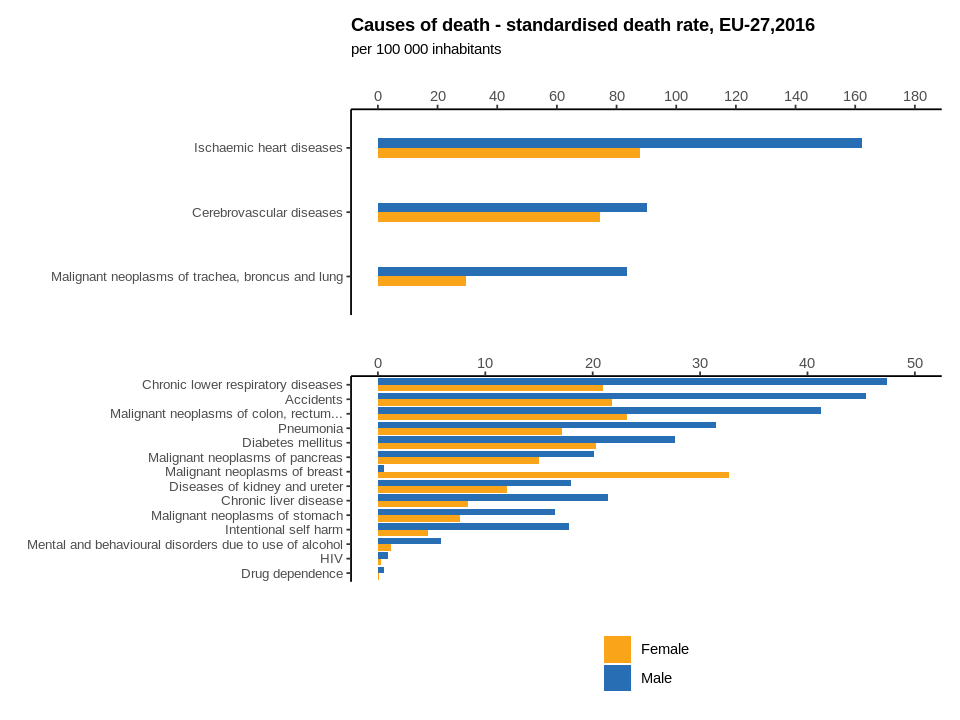

In [27]:
fig31<- ggplot(data_fig31, aes(x=icd10,y=values)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.3) +
            coord_flip()+
            theme_classic()+
            scale_x_discrete(limits=c("C33_C34","I60-I69","I20-I25") ,
                             labels=c("Malignant neoplasms of trachea, broncus and lung",
                                    "Cerebrovascular diseases","Ischaemic heart diseases")) +
            scale_y_continuous(position = "right",limits = c(0, 180), breaks = seq(0, 180, by = 20))+
        theme(legend.position="none")+
        scale_fill_manual(labels=c("Female","Male"),values = c("#faa519","#286eb4"), name = " ")+
        ylab(" ")+
        xlab(" ")+
        ggtitle("Causes of death - standardised death rate, EU-27,2016",subtitle="per 100 000 inhabitants")+
        theme(axis.text.y=element_text(size=8), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())
fig32 <- ggplot(data_fig32, aes(x=icd10,y=values)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge") +
            coord_flip()+
             theme_classic()+
            scale_x_discrete(limits=c("TOXICO","B20-B24","F10","X60-X84_Y870","C16","K70_K73_K74","N00-N29","C50","C25",
                                              "E10-E14","J12-J18","C18-C21","ACC","J40-J47") ,
                             labels=c("Drug dependence","HIV","Mental and behavioural disorders due to use of alcohol",
                                     "Intentional self harm","Malignant neoplasms of stomach","Chronic liver disease",
                                     "Diseases of kidney and ureter","Malignant neoplasms of breast",
                                      "Malignant neoplasms of pancreas",
                                     "Diabetes mellitus","Pneumonia",
                                      "Malignant neoplasms of colon, rectum...",
                                     "Accidents","Chronic lower respiratory diseases")) +
            scale_y_continuous(position = "right",limits = c(0, 50), breaks = seq(0, 50, by = 10))+
        theme(legend.position="bottom",legend.direction="vertical") +
        scale_fill_manual(labels=c("Female","Male"),values = c("#faa519","#286eb4"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        theme(axis.text.y=element_text(size=8))
fig31 / fig32

### Figure 4: Deaths from ischaemic heart diseases - standardized death rate, 2017

#### First steps: Apply relevant filters

  - keeping variable with causes of death relevant for the graphic (ischaemic heart diseases = `I20-I25`)
  - keeping only observations of countries specified in countries variable at the beginning, `age` in total
  - using the values for year 2017 (for EU27 and France from 2016), creating new `values_n` variable
  - deleting unused variables & levels from dataset (`age`, `unit`, `time`, `icd-10`, old values variable)
  - checking structure/ values of ordered dataset (do they match to the graphic)

In [28]:
data_fig4 <- subset(dataset1, (dataset1$time==2016 | dataset1$time==2017)  & 
                    dataset1$geo %in% countries &
                    dataset1$icd10=="I20-I25" &
                   dataset1$age=="TOTAL")
data_fig4 <- droplevels(data_fig4)
data_fig4$values_n <- ifelse(data_fig4$time==2017,data_fig4$values,NA)
data_fig4[data_fig4$geo=="FR",]$values_n <- data_fig4[data_fig4$geo=="FR",]$values
data_fig4[data_fig4$geo=="EU27_2020",]$values_n <- data_fig4[data_fig4$geo=="EU27_2020",]$values
data_fig4 <- data_fig4[!is.na(data_fig4$values_n),]
data_fig4 <- data_fig4[,-c(1,3,4,6,7)]

#### Second step: Modify dataset

  - changing the order within the dataset to get the ranked structure
  - ranking on the combined values of males and females (using total of `sex`) & releveling of the variable _icd10_ according to ranks & structure in original data set)

In [29]:
data_fig4 <- subset(data_fig4,data_fig4$sex !="T")
data_fig4$geo <- factor(data_fig4$geo,levels = c("EU27_2020", #EU 27
                    
            "LT", #Lithuania
            "HU", #Hungary
            "SK", #Slovakia
             "LV", #Lativia
            "HR", #Croatia
            "RO", #Romania                                     
            "CZ", #Czechia
            "EE", #Estonia
            "BG", #Bulgaria
            "MT", #Malta
            "FI", #Finland
            "AT", #Austria
            "PL", #Poland
            "DE", #Germany
            "IE", #Ireland
            "SE", #Sweden
             "CY", #Cyprus
            "EL", #Greece
            "SI", #Slovenia
            "IT", #Italy
            "LU", #Luxembourg
            "DK", #Denmark
            "BE", #Belgium
            "PT", #Portugal
            "ES", #Spain                                    
             "NL", #Netherlands
              "FR", #France                                 
            "UK", #United Kingdom                                
            "IS", #Iceland
            "CH", #Switzerland
            "NO", #Norway
            "LI", #Liechtenstein                                  
             "TR", #Turkey
              "RS" ))# Serbia

#### Third step: Create graphic with `ggplot2`

  - using the package `ggplot` to create the combined bar plot for males and females
  - creating the space with `aes` (causes of death on `x` axis and values on `y` axis)
  - creating the bar plot with `geom_bar` command, grouped by sex (`fill=sex`) with bar beside bar (`position="dodge"`), `barwidth`
  - changing the labels of `x`-axis according to countries
  - creating the legend and colors for the bars with `scale_fill_manual` with `sex` (colors token from the original with hex code)
  - deleting `labels` of the axes
  - creating the `title` with `subtitle`
  - changing the size of `title` and `subtitle`, axis label

In [30]:
data_fig4$sex <- relevel(data_fig4$sex,ref="M")

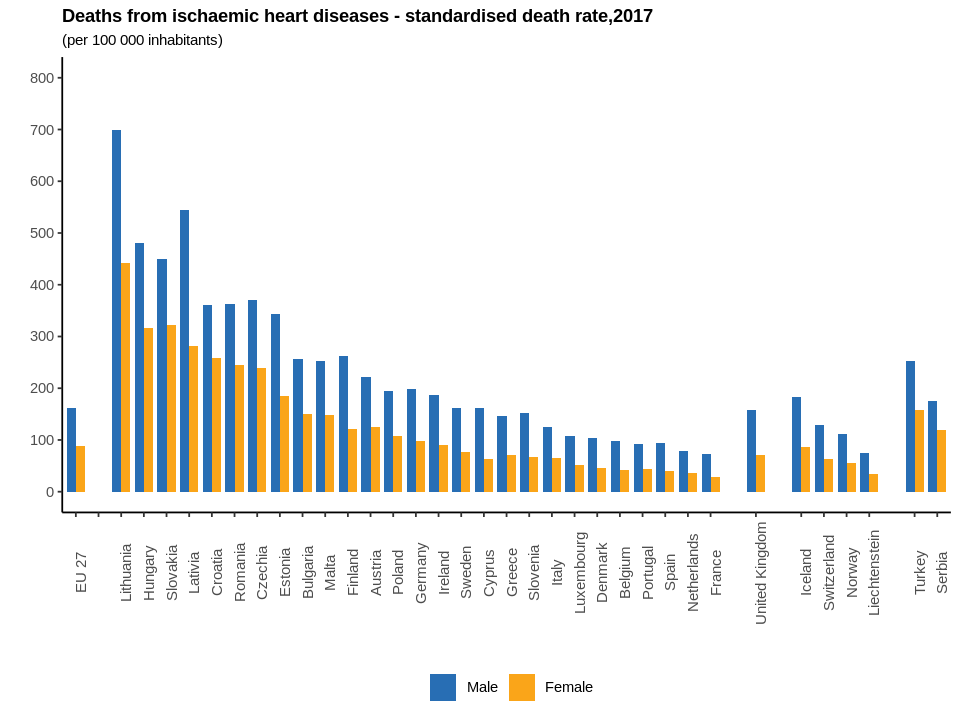

In [31]:
ggplot(data_fig4, aes(x=geo,y=values_n)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.8) +
            theme_classic()+
            scale_x_discrete(limits=c("EU27_2020"," ",
                                      "LT", "HU","SK","LV","HR","RO","CZ","EE", "BG", "MT","FI", "AT", "PL", "DE",
                "IE", "SE","CY", "EL","SI","IT","LU","DK", "BE","PT", "ES",  "NL","FR"," ",
                                      "UK"," ",
                                      "IS","CH", "NO","LI"," ",
                                      "TR","RS" ) ,
                             labels=c("EU 27"," ",
                                      "Lithuania","Hungary","Slovakia","Lativia","Croatia","Romania",
                                      "Czechia","Estonia","Bulgaria","Malta","Finland","Austria","Poland","Germany",
                                      "Ireland","Sweden","Cyprus","Greece","Slovenia","Italy","Luxembourg","Denmark",
                                      "Belgium","Portugal","Spain","Netherlands","France"," ",
                                      "United Kingdom", " ",
                                      "Iceland", "Switzerland","Norway","Liechtenstein"," ",
                                      "Turkey","Serbia")) +
            scale_y_continuous(limits = c(0, 800), breaks = seq(0, 800, by = 100))+
        theme(legend.position="bottom",legend.direction="horizontal") +
        scale_fill_manual(labels=c("Male","Female"),values = c("#286eb4","#faa519"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        ggtitle("Deaths from ischaemic heart diseases - standardised death rate,2017",
                subtitle="(per 100 000 inhabitants)")+
        theme(axis.text.x=element_text(angle=90,size=9), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())


### Figure 4: Deaths from suicide - standardized death rate, 2017

#### First steps: Apply relevant filters

  - keeping variable with causes of death relevant for the graphic (suicide = `X60-X84_Y870`)
  - keeping only observations of countries specified in countries variable at the beginning, `age` in total
  - using the values for year 2017 (for EU27, Liechenstein France from 2016), creating new `values_n` variable
  - deleting unused variables & levels from dataset (`age`, `unit`, `time`, _icd-10_, old values variable)

In [32]:
data_fig5 <- subset(dataset1, (dataset1$time==2016 | dataset1$time==2017)  & 
                    dataset1$geo %in% countries &
                    dataset1$icd10=="X60-X84_Y870" &
                   dataset1$age=="TOTAL")
data_fig5 <- droplevels(data_fig5)
data_fig5$values_n <- ifelse(data_fig5$time==2017,data_fig5$values,NA)
data_fig5[data_fig5$geo=="FR",]$values_n <- data_fig5[data_fig5$geo=="FR",]$values
data_fig5[data_fig5$geo=="EU27_2020",]$values_n <- data_fig5[data_fig5$geo=="EU27_2020",]$values
data_fig5[data_fig5$geo=="LI",]$values_n <- data_fig5[data_fig5$geo=="LI",]$values
data_fig5 <- data_fig5[!is.na(data_fig5$values_n),]
data_fig5 <- data_fig5[,-c(1,3,4,6,7)]
#str(data_fig4)
#tail(data_fig5)

#### Second step: Modify dataset

  - changing the order within the dataset to get the ranked structure
  - ranking on the combined values of males and females (using total of `sex`) & releveling of the variable icd10 according to ranks & structure in original data set)

In [33]:
data_fig5 <- subset(data_fig5,data_fig5$sex !="T")
data_fig5$geo <- factor(data_fig5$geo,levels = c("EU27_2020", #EU 27
                    
            "LT", #Lithuania
            "SI", #Slovenia
            "LV", #Lativia
             "EE", #Estonia
            "HU", #Hungary   
             "BE", #Belgium                                     
            "FI", #Finland
           "HR", #Croatia
            "AT", #Austria
            "FR", #France
            "CZ", #Czechia 
            "SE", #Sweden                                    
            "PL", #Poland
            "NL", #Netherlands
            "DE", #Germany
            "DK", #Denmark
            "RO", #Romania
            "BG", #Bulgaria
            "PT", #Portugal
            "LU", #Luxembourg
            "IE", #Ireland
            "ES", #Spain                                    
             "SK", #Slovakia
             "IT", #Italy                                    
              "MT", #Malta
            "EL", #Greece 
            "CY", #Cyprus                                    
            "UK", #United Kingdom
            "LI", #Liechtenstein                                      
            "CH", #Switzerland
            "NO", #Norway
            "IS", #Iceland                            
             "RS", #Serbia
              "TR" ))#Turkey

#### Third step: Create graphic with `ggplot2`

  - using the package `ggplot` to create the combined bar plot for males and females
  - creating the space with `aes` (causes of death on x axis and values on y axis)
  - creating the bar plot with `geom_bar command`, grouped by sex (`fill=sex`) with bar beside bar (`position="dodge"`), `barwidth`
  - changing the labels of `x`-axis according to countries
  - creating the legend and colors for the bars with `scale_fill_manual` with `sex` (colors token from the original with hex code)
  - deleting `labels` of the axes
  - creating the `title` with `subtitle`
  - changing the size of `title` and `subtitle`, axis label

In [34]:
data_fig5$sex <- relevel(data_fig5$sex,ref="M")

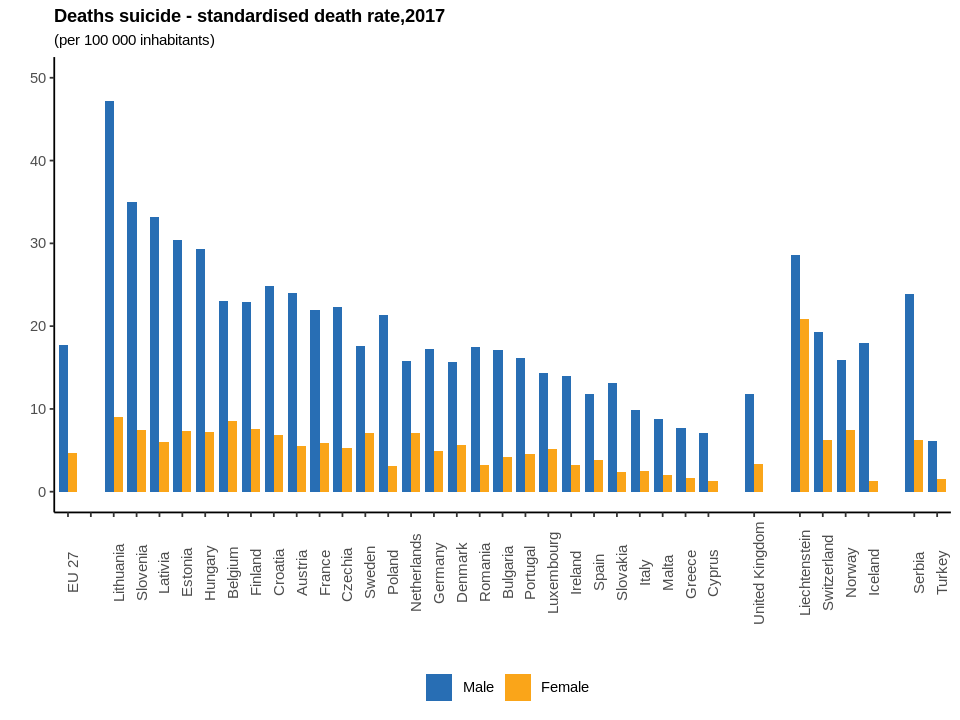

In [35]:
ggplot(data_fig5, aes(x=geo,y=values_n)) +
            geom_bar(stat = "identity",aes(fill=sex),position="dodge",width=0.8) +
            theme_classic()+
            scale_x_discrete(limits=c("EU27_2020","","LT","SI","LV","EE","HU", "BE","FI", "HR","AT", "FR",  "CZ","SE","PL", 
                                      "NL","DE","DK","RO","BG", "PT", "LU","IE","ES","SK","IT","MT","EL","CY","","UK", "",
                                      "LI", "CH","NO","IS","", "RS", "TR" ),
                             labels=c("EU 27","","Lithuania","Slovenia","Lativia","Estonia",
                                      "Hungary","Belgium","Finland","Croatia","Austria","France",
                                      "Czechia ","Sweden","Poland","Netherlands","Germany","Denmark","Romania",
                                      "Bulgaria","Portugal","Luxembourg","Ireland","Spain","Slovakia","Italy","Malta",
                                      "Greece ","Cyprus","","United Kingdom","","Liechtenstein","Switzerland",
                                      "Norway","Iceland","",
                                      "Serbia","Turkey")) +
            scale_y_continuous(limits = c(0, 50), breaks = seq(0, 50, by = 10))+
        theme(legend.position="bottom",legend.direction="horizontal") +
        scale_fill_manual(labels=c("Male","Female"),values = c("#286eb4","#faa519"), name = " ") +
        ylab(" ")+
        xlab(" ")+
        ggtitle("Deaths suicide - standardised death rate,2017",
                subtitle="(per 100 000 inhabitants)")+
        theme(axis.text.x=element_text(angle=90,size=9), plot.title = element_text(size = 11, face = "bold"),
          plot.subtitle = element_text(size=9),legend.title=element_blank())


## Causes of death in 2017 of people below 65 years of age

The code here will help reproducing the material presented in the section [Causes of death in 2017 of people below 65 years of age](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

### Table 2: Major causes of death for persons aged less than 65 years, 2017

#### First steps: Filter data accordingly:
  
  - only keeping relevant countries & people aged less than 65 years
  - creating one values variable with values from 2017 and from 2016 where 2017 not available (for France and EU27 category)
  - using for causes of death like breast cancer only females data
  - Keeping only causes of death relevant for table

In [36]:
datatbl2 <- subset(dataset1,
                     dataset1$age =="Y_LT65" & 
                     dataset1$geo %in% countries & 
                     (dataset1$time==2017 | dataset1$time==2016))

In [37]:
datatbl2$values_n <- ifelse(datatbl2$time==2017,datatbl2$values,NA)
datatbl2[datatbl2$geo=="FR",]$values_n <- datatbl2[datatbl2$geo=="FR",]$values
datatbl2[datatbl2$geo=="EU27_2020",]$values_n <- datatbl2[datatbl2$geo=="EU27_2020",]$values
datatbl2 <- datatbl2[!is.na(datatbl2$values_n),]

In [38]:
causes <- c("I","I20-I25","C","C33_C34","C18-C21","J","G_H","V_Y85","X60-X84_Y870","C50","C53","C54_C55")
causes2 <- c("Circulatory disease","Heart disease","Cancer","Lung Cancer","Colorectal cancer","Respiratory diseases",
             "Diseases of the nervous system","Transport accidents","Suicide","Breast Cancer(Females)","Cancer of the cervix(Females)","Cancer of the uterus(Females)")
datatbl2 <- datatbl2[datatbl2$icd10 %in% causes,]
datatbl2_v <- datatbl2[datatbl2$icd10 %in% causes,]
datatbl2 <- subset(datatbl2_v,datatbl2_v$sex=="T")
datatbl1$values_n[datatbl2$icd10 == "C50"] <- datatbl2_v$values_n[datatbl2_v$icd10=="C50"&datatbl2_v$sex=="F"]
datatbl2$values_n[datatbl2$icd10 == "C53"] <- datatbl2_v$values_n[datatbl2_v$icd10=="C53"&datatbl2_v$sex=="F"]
datatbl2$values_n[datatbl2$icd10 == "C54_C55"] <- datatbl2_v$values_n[datatbl2_v$icd10=="C54_C55"&datatbl2_v$sex=="F"]
datatbl2 <- datatbl2[,c(4,5,8)]
#tail(datatbl2)

#### Second steps: Table

  - changing data frame format: 
    - create seperate data frame for every cause (with two columns, country & values of death rate)
    - order data frames according to the order of the original datatable & add columnnames
  - creating new dataset in style of the original data table
  - printing data table

In [39]:
datlist2 <- vector(mode="list",12)
for(i in 1:length(causes)){
  datlist2[[i]] <- subset(datatbl2,datatbl2$icd10 == causes[i])
  datlist2[[i]] <- datlist2[[i]][,-1]
  datlist2[[i]] <- datlist2[[i]][order(factor(datlist2[[i]]$geo, levels= countries)),]
  colnames(datlist2[[i]]) <- c("country",causes2[i])
}
(table2 <- cbind(Country,datlist2[[1]][,2],
      datlist2[[2]][,2],
      datlist2[[3]][,2],
      datlist2[[4]][,2],
      datlist2[[5]][,2],
      datlist2[[6]][,2],
      datlist2[[7]][,2],
      datlist2[[8]][,2],
      datlist2[[9]][,2],
      datlist2[[10]][,2],
      datlist2[[11]][,2],
      datlist2[[12]][,2]))

Country,Circulatory disease,Heart disease,Cancer,Lung Cancer,Colorectal cancer,Respiratory diseases,Diseases of the nervous system,Transport accidents,Suicide,Breast Cancer(Females),Cancer of the cervix(Females),Cancer of the uterus(Females)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EU-27,44.80,17.92,77.34,19.06,7.23,9.13,5.46,5.27,9.21,7.08,2.67,1.95
Belgium,28.95,10.39,65.27,17.27,5.56,9.25,6.25,4.97,14.39,6.88,2.03,1.21
Bulgaria,164.15,38.44,94.04,21.94,9.21,18.23,4.64,7.82,6.59,7.30,6.79,4.53
Czechia,58.71,26.56,75.28,15.09,8.44,11.83,4.92,6.21,11.88,5.22,3.39,2.15
Denmark,27.94,9.57,66.62,16.11,6.82,10.93,6.19,2.90,8.50,6.20,2.01,0.91
Germany,36.12,16.27,69.35,17.00,6.08,8.93,5.96,3.53,8.31,6.88,2.32,1.41
Estonia,81.28,32.29,80.57,13.83,7.22,6.82,7.38,4.59,15.79,6.73,5.54,2.80
Ireland,30.13,16.41,64.22,12.36,7.01,7.10,6.19,2.33,8.78,7.57,2.59,1.37
Greece,50.34,28.61,73.27,19.62,5.32,5.98,6.32,7.35,4.02,6.51,1.28,2.35


#### Additional

  - Creating HTML data table with kableExtra package with adjusted colors and footnotes

In [40]:
kbl (table2)%>%
    row_spec(0,background="#eded6d",bold=T)%>%
    row_spec (1,background="#edd16d") %>%
    row_spec(29,background="#cfccc4") %>%
    row_spec(30:33,background="#b8b5ad") %>%
    row_spec(34:35,background="#a19e99") %>%
    footnote(general="Heart disease = ischeamic heart diseases,
    Cancer = malignant neoplasms, 
    Lung cancer = malignant neoplasms of trachea, bronchus and lung,
    France & EU 27 with numbers from 2016, 
    Definitions differ for Turkey,
    Source: https://ec.europa.eu/eurostat/databrowser/view/hlth_cd_asdr2/default/table?lang=en") %>%
    kable_styling(bootstrap_options=c("striped","hover"))%>%
    kable_paper (full_width=FALSE) %>% as.character() %>%   IRdisplay::display_html()

Country,Circulatory disease,Heart disease,Cancer,Lung Cancer,Colorectal cancer,Respiratory diseases,Diseases of the nervous system,Transport accidents,Suicide,Breast Cancer(Females),Cancer of the cervix(Females),Cancer of the uterus(Females)
EU-27,44.80,17.92,77.34,19.06,7.23,9.13,5.46,5.27,9.21,7.08,2.67,1.95
Belgium,28.95,10.39,65.27,17.27,5.56,9.25,6.25,4.97,14.39,6.88,2.03,1.21
Bulgaria,164.15,38.44,94.04,21.94,9.21,18.23,4.64,7.82,6.59,7.30,6.79,4.53
Czechia,58.71,26.56,75.28,15.09,8.44,11.83,4.92,6.21,11.88,5.22,3.39,2.15
Denmark,27.94,9.57,66.62,16.11,6.82,10.93,6.19,2.90,8.50,6.20,2.01,0.91
Germany,36.12,16.27,69.35,17.00,6.08,8.93,5.96,3.53,8.31,6.88,2.32,1.41
Estonia,81.28,32.29,80.57,13.83,7.22,6.82,7.38,4.59,15.79,6.73,5.54,2.80
Ireland,30.13,16.41,64.22,12.36,7.01,7.10,6.19,2.33,8.78,7.57,2.59,1.37
Greece,50.34,28.61,73.27,19.62,5.32,5.98,6.32,7.35,4.02,6.51,1.28,2.35
Spain,26.59,11.14,68.52,17.60,7.07,7.20,5.07,3.95,6.19,5.65,1.71,1.60


### Figure 5: Causes of death - standardized death rate, ages less than 65, 2017

#### First steps: Apply relevant filters
 
  - keeping variable with causes of death relevant for the graphic: (`C18-C21`=Cororectal cancer, `C_33-C34`=Lung cancer, `C`=Cancer, `C_50`=Breast Cancer, `I`=Circulatory diseases, `I20_I25`=Ischaemic heart disease, `V_Y85`=Transport Accidents)
  - only inhabitants aged less than 65
  - EU 27 summarizing category
  - 2006-2016: using merged `dataset_3` from above with data from 2006-2016

In [41]:
causes_fig6 <- c("C18-C21","C","C50","I","I20-I25","V_Y85","C33_C34")
data_fig6 <- subset(dataset_3, dataset_3$geo =="EU27_2020" &
                   dataset_3$age =="Y_LT65" &
                   dataset_3$icd10 %in% causes_fig6 &
                   dataset_3$sex=="T")
data_fig6 <- droplevels(data_fig6)

#### Second step: Standardize such that 2006 = 100

  - taking values from year 2006 for each cause (2009 for lung cancer)
  - dividing all other respective values with value from 2006/2009 divided by 100

In [42]:
for (i in 1:6){
    data_fig6$values[data_fig6$icd10==causes_fig6[i]] <- (data_fig6$values[data_fig6$icd10==causes_fig6[i]])/
    ((data_fig6$values[data_fig6$icd10==causes_fig6[i] & data_fig6$time==2006])/100)
}
data_fig6$values[data_fig6$icd10==causes_fig6[7]] <- (data_fig6$values[data_fig6$icd10==causes_fig6[7]])/
    ((data_fig6$values[data_fig6$icd10==causes_fig6[7] & data_fig6$time==2009])/100)

In [43]:
sapply(data_fig6,function(x)(sum(is.na(x))))

unit    sex    age  icd10    geo   time values 
     0      0      0      0      0      0      0

#### Third step: Create graphic with `ggplot2`

  - using the package `ggplot` to create the line plot for different diseases
  - creating the space with `aes` (years on `x` axis and values on `y` axis), grouped by causes of deaths
  - creating the plot with `geom_line` command, colors according to causes of deaths
  - adding a horizontal line for values/ death rate = 100
  - adding a `title`
  - changing the labels & limits of `x`-axis & `y`-axis according to countries
  - creating the legend and colors for the bars with `scale_fill_manual` with `sex` (colors token from the original with hex code)
  - deleting `labels` of the axes
  - changing the size of `title` and `subtitle`, axis label

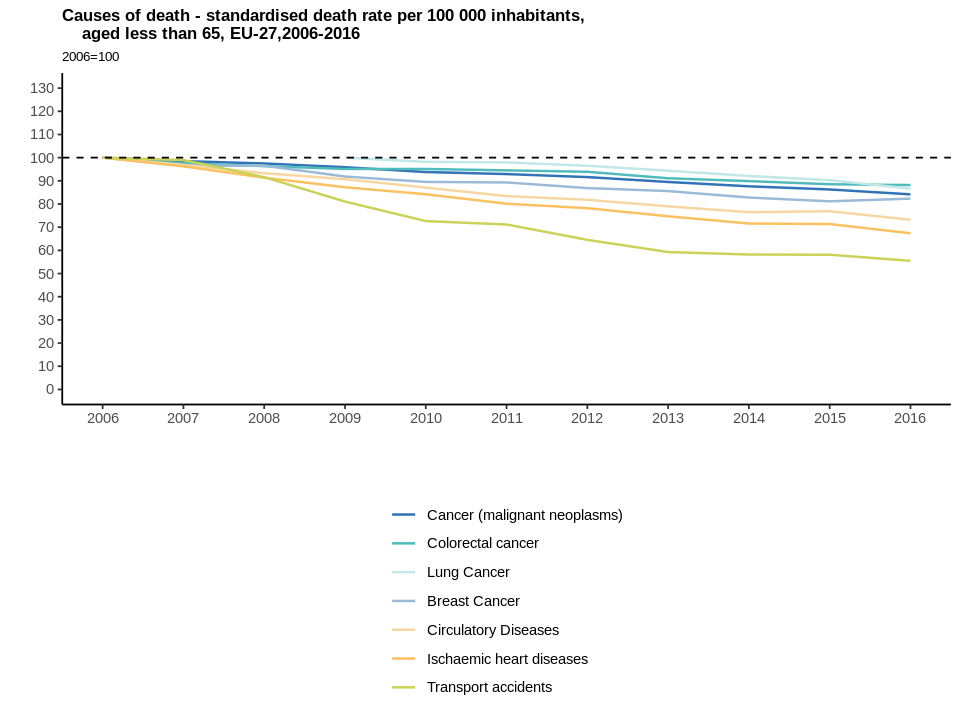

In [44]:
figure1 <- ggplot(data_fig6, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10),lwd=0.7) + 
    geom_hline(yintercept=100,lty=2) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants,
    aged less than 65, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)","Colorectal cancer", "Lung Cancer",
                                  "Breast Cancer","Circulatory Diseases","Ischaemic heart diseases","Transport accidents"), 
            values = c("#3074b7","#50bbbb","#c1e7e7","#9bbad8","#f7d7a1","#fbc160","#cbd258"),name = " ") +
    ylab(" ")+
    xlab(" ")

figure1 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

## Additional material: Idea for deeper analysis of the data

### Analyse death rates in framework of time series analysis

   - take for example one country or EU 27 category (over all causes) and look for trends, seasonality _etc..._ in the time series
  - it could be an interesting analysis especially if data is updated with numbers from 2020 to see if *Covid-19* disease lead to an increase or higher trend or even structural break in the death rates
  - use `R` functions for time series analysis: `decompose` to decompose the time series in trend, seasonal, and rest components
  - use `R` function `lm` to estimate time trend in the data, adjust model
  - `R` package for structural breaks: [`strucchange`](https://cran.r-project.org/web/packages/strucchange/strucchange.pdf)
    - powerful package for detecting and dating change points in the course of a time series
    - function breakpoints can be applied to date multiple change points
    - function Fstats with sctest applies hypothesis test for "no structural break" vs. "structural break"
  - compare different countries or member states _vs._ potential member states with respect to the course of overall death rate